# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDB Movie Dataset contains data about 10 thousend movie, it include the movie name, cast members, production companies, etc.
Some of quistion one would ask is What genres are most popualr?, which genres get the most reveune?, Who are the actors/actress with high move ratings ?, which production companies related to high vote ratings ?


In [1]:
# import needed libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Here will explore the data and see what each columns represent, and what to clean.

In [2]:
df = pd.read_csv('movies_data.csv')

In [3]:
# quick view to the data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# checking all columns names, type,and any missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Checking the missing values columns**: afeter using info(), we can see clearlly the missing values in each column.
The homepage column seems to have alot of null values, also kaywords column and tagline has a number of null values.

other missing columns: overview, genres, production_companies, director

Let's see what each column repersent.

In [6]:
df.homepage.head()

0                        http://www.jurassicworld.com/
1                          http://www.madmaxmovie.com/
2       http://www.thedivergentseries.movie/#insurgent
3    http://www.starwars.com/films/star-wars-episod...
4                             http://www.furious7.com/
Name: homepage, dtype: object

In [7]:
df.tagline.head()

0                The park is open.
1               What a Lovely Day.
2       One Choice Can Destroy You
3    Every generation has a story.
4              Vengeance Hits Home
Name: tagline, dtype: object

In [8]:
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [9]:
df.overview.head()

0    Twenty-two years after the events of Jurassic ...
1    An apocalyptic story set in the furthest reach...
2    Beatrice Prior must confront her inner demons ...
3    Thirty years after defeating the Galactic Empi...
4    Deckard Shaw seeks revenge against Dominic Tor...
Name: overview, dtype: object

I don't belive that any of the above columns can make any real differnce in any way, for now.

In [10]:
df.production_companies.unique()

array(['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ...,
       'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

In [11]:
# checking the director missing values.
df[df.director.isnull()].head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.0,0.0
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0


In [12]:
df.genres.str.split('|').head() # to see more clearlly.

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

###### Zero values in Budget & Revenue 
Another problem that was not shown using the info() is Budget & Revenue 50% of the records are Zeros.

In [13]:
df.describe().budget

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [14]:
df.describe().revenue

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64


### General Data Cleaning 

**Fixing columns types**: All columns seems to have an appropriate data type to represent it's content.
except for relese_date, i will keep release_year as int to do math ops easlly.

In [15]:
type(df.release_date[0])

str

In [16]:
df.release_date = pd.to_datetime(df.release_date);
type(df.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
cdf = df.copy() # clean dataframe

In [18]:
# droping unimportant columns
cdf.drop(['imdb_id','homepage','tagline','overview','keywords'],axis=1,inplace=True)

In [19]:
# droping null values:
cdf.dropna(inplace=True)

In [20]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [21]:
cdf.duplicated().sum() # number of duplicated values.

1

In [22]:
cdf.drop_duplicates(inplace = True)

In [23]:
cdf.duplicated().sum()

0

#### let's deal with values seprated with " | " in cast, genres, production_companies.


In [24]:

cast = cdf.cast.str.split("|") # turn it to panda series.
cast.head()
cdf.cast = cast

cdf.cast.head()

0    [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1    [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2    [Shailene Woodley, Theo James, Kate Winslet, A...
3    [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4    [Vin Diesel, Paul Walker, Jason Statham, Miche...
Name: cast, dtype: object

In [25]:
genres = cdf.genres.str.split("|") # turn it to panda series.
genres.head()
cdf.genres = genres

cdf.genres.head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

In [26]:
production_companies = cdf.production_companies.str.split("|") # turn it to panda series.
production_companies.head()
cdf.production_companies = production_companies

cdf.production_companies.head()

0    [Universal Studios, Amblin Entertainment, Lege...
1    [Village Roadshow Pictures, Kennedy Miller Pro...
2    [Summit Entertainment, Mandeville Films, Red W...
3        [Lucasfilm, Truenorth Productions, Bad Robot]
4    [Universal Pictures, Original Film, Media Righ...
Name: production_companies, dtype: object

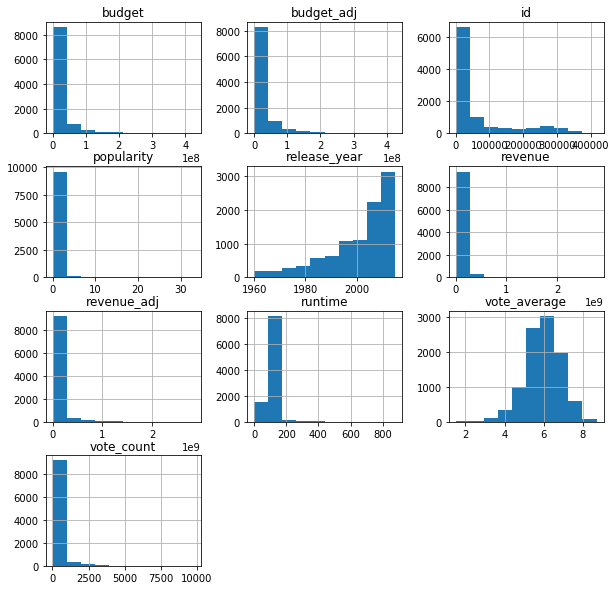

In [27]:
cdf.hist(figsize=(10,10)); # qiuck view of the clean-df so far.

In [28]:
cdf.query('vote_count < 1000').count() # more than 90% of vote_count is below 1000. 

id                      9208
popularity              9208
budget                  9208
revenue                 9208
original_title          9208
cast                    9208
director                9208
runtime                 9208
genres                  9208
production_companies    9208
release_date            9208
vote_count              9208
vote_average            9208
release_year            9208
budget_adj              9208
revenue_adj             9208
dtype: int64

In [29]:
# more info on theis field: https://developers.themoviedb.org/3/getting-started/popularity 
# found this URL in a kaggle Discussion

cdf.popularity.describe()

count    9772.000000
mean        0.694721
std         1.036931
min         0.000188
25%         0.232710
50%         0.419762
75%         0.776408
max        32.985763
Name: popularity, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


In [30]:
# copy the clean data.
df1 = cdf.copy()

In [31]:
# function will take an argument of a list of lists and return a flattens version of it as pandas.Series. 
def flat(t):
    a = []
    for i in range(len(t)):
        for j in range(len(t.iloc[i])):
            a.append(t.iloc[i][j])
    a = pd.Series(a)
    return a

### Who are the actors/actress with high movie ratings?

In [32]:
high_df = df.query('vote_average >= 7') # a new df with high movie rating.
t = high_df['cast']


In [33]:
t = t.str.split('|') # split
t.isnull().sum()

38

In [34]:
t = t.dropna()

In [35]:
top_actors = flat(t).value_counts()


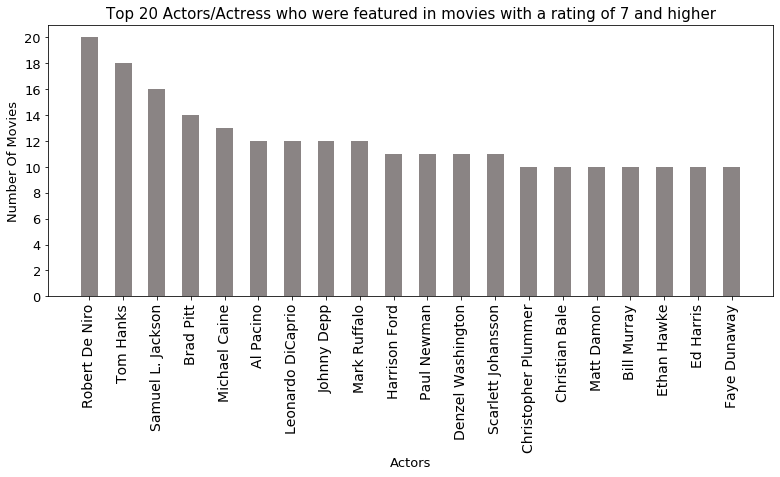

In [36]:
# visual the top actors/actress using matplotlib.
x = top_actors.index[0:20] # actors/actress names
y = top_actors.values[0:20] # the freq.

plt.figure(figsize=(13,5))
plt.bar(x,y,width=0.5,color='#8a8484')
plt.xticks(rotation='vertical',fontsize=14)
plt.yticks(np.arange(0,y.max()+1,2),fontsize=13)
plt.ylabel('Number Of Movies',fontsize=13)
plt.xlabel('Actors',fontsize=13)
plt.title('Top 20 Actors/Actress who were featured in movies with a rating of 7 and higher',fontsize=15);

### What genres generate most  revenues?

> **Refrences** used to plot the pie chart.
>
> https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
> https://github.com/codebasics/py/blob/master/matpltlib/6_pie_chart/6_pie_chart.ipynb

In [37]:
df1.revenue.describe() # get statistics description about the revenue.

count    9.772000e+03
mean     4.423121e+07
std      1.225889e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.104729e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [38]:
df1.query('revenue > 0').revenue.median() # get the median about the revenue.

33316765.5

In [39]:
high_rev = df1.query('revenue > 33316765.5') # filter by high revenue.

In [40]:
high_rev.shape # see the shape

(2375, 16)

In [41]:
rev_gen = flat(high_rev.genres).value_counts() # return a list of the genres and corresponding count


In [42]:
total = rev_gen.sum() # sum of total count of all genres, to get the proporation.
prop = []
for i in range(10): # 10 to get the top 10 most genres related with high reveune.
    x = rev_gen[i] / total
    prop.append(x * 100) # get the percentge as 10% not 0.1
others = 100 - sum(prop) # for the outher categories who were not in the top 10.
prop.append(others)

In [43]:
labels = list(rev_gen.index[:10]) # names of the top 10 genres.
labels.append('Others')

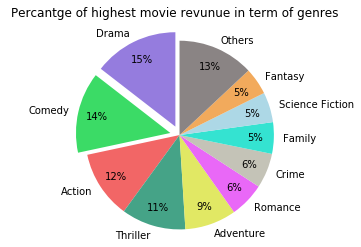

In [44]:
explode = (0.2,0.2,0,0,0,0,0,0,0,0,0) # the first two slice will be cut of the pie chart.
colors = ['#957cde','#3bdb66','#f26666','#45a387','#e1e864','#e968f7','#c4c3b7','#34e3d1','lightblue','#f2aa5c','#8a8484']
# autopct='%0.0f%%': to whole numbers.
# startangle=90: change the direction of the pie.
# pctdistance=0.80: move the percenatge up the slice.
plt.pie(prop, labels=labels, colors=colors, explode=explode, autopct='%0.0f%%', startangle=90,pctdistance=0.80,radius=2)
plt.axis('equal') # to have the shape of the pie circular.
plt.title('Percantge of highest movie revunue in term of genres')
plt.show();

### What production companies with high movie ratings?


In [45]:
high_df = df.query('vote_average >= 7.5') # a new df with high movie rating.
t = high_df['production_companies']

In [46]:
t = t.str.split('|')
t.isnull().sum() # some values are missing inside the inner lists.

87

In [47]:
t = t.dropna() # droping the NA values inside the production_companies.

In [48]:
top_comp = flat(t).value_counts()

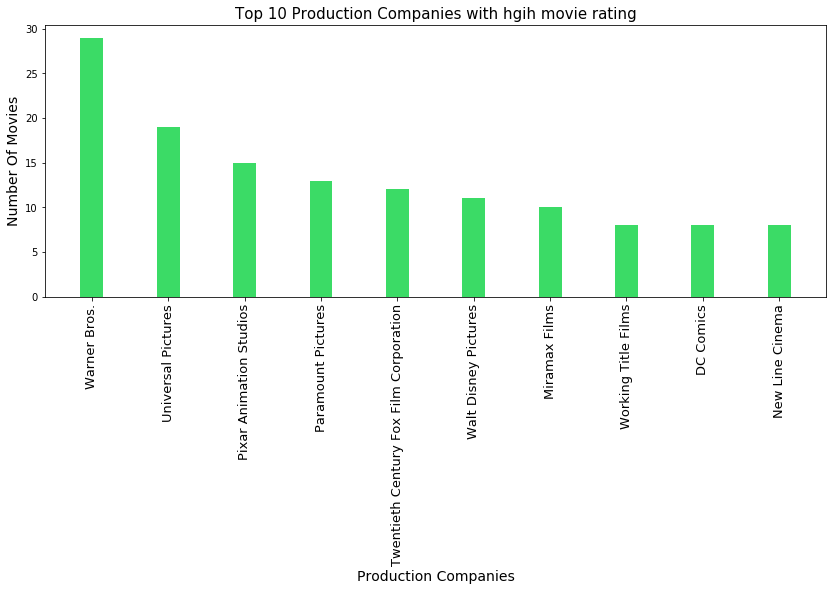

In [49]:
x = top_comp.index[0:10]
y = top_comp.values[0:10]

plt.figure(figsize=(14,5))
plt.bar(x,y,width=0.3,color='#3bdb66')
plt.xticks(rotation='vertical',fontsize=13)
plt.ylabel('Number Of Movies',fontsize=14)
plt.xlabel('Production Companies',fontsize=14)
plt.title('Top 10 Production Companies with hgih movie rating' ,fontsize=15);

### Which Genres are most popular in each decade? 


The below cells almost identical, at ech cell a new dataframe will be created to represent each decade.
each list will be flattend using the function flat() created above and will get value_counts,
then will slice the four most popular genres.

In [50]:
six = df1.query('release_year < 1970')
six_gen = flat(six.genres).value_counts()
all_six = six_gen.values.sum()
six_gen = six_gen[0:4]
six_gen

Drama      163
Comedy     108
Action      75
Romance     65
dtype: int64

In [51]:
seven = df1[(df1['release_year'] >= 1970) & (df1['release_year'] < 1980)]
seven_gen = flat(seven.genres).value_counts()
all_seven = seven_gen.values.sum()
seven_gen = seven_gen[0:4]
seven_gen

Drama       237
Thriller    147
Action      119
Comedy      116
dtype: int64

In [52]:
eight = df1[(df1['release_year'] >= 1980) & (df1['release_year'] < 1989)]
eight_gen = flat(eight.genres).value_counts()
all_eight = eight_gen.values.sum()
eight_gen = eight_gen[0:4]
eight_gen

Drama       350
Comedy      346
Action      223
Thriller    218
dtype: int64

In [53]:
nine = df1[(df1['release_year'] >= 1990) & (df1['release_year'] < 2000)]
nine_gen = flat(nine.genres).value_counts()
all_nine = nine_gen.values.sum()
nine_gen = nine_gen[0:4]
nine_gen

Drama       827
Comedy      699
Thriller    482
Action      436
dtype: int64

In [54]:
now = df1[df1['release_year'] >= 2000]
now_gen = flat(now.genres).value_counts()
all_now = now_gen.values.sum()
now_gen = now_gen[0:4]
now_gen

Drama       2734
Comedy      2105
Thriller    1801
Action      1344
dtype: int64

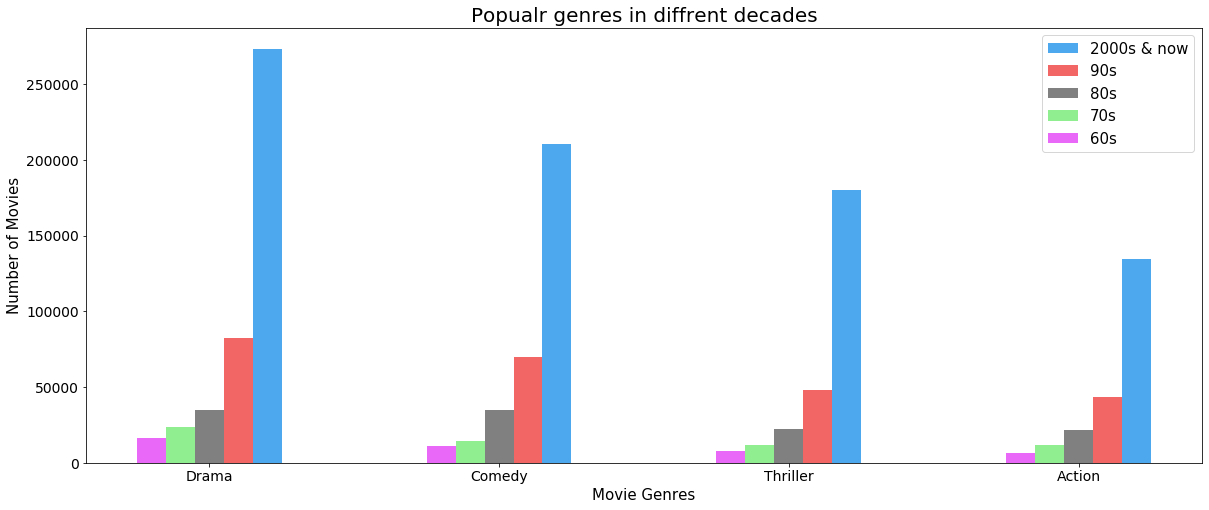

In [55]:
# keys are the idices of each list which are the genres.
# xpos to have a numeric x-axis to represent the categorical variables.
# using this way we can simplly move each bar using math ops, as shown below when I did xpos+1, etc.
# idea behind xpos is taking from https://github.com/codebasics/py/blob/master/matpltlib/4_bar_chart/4_bar_chart.ipynb

keys = now_gen.index
values = now_gen.values 
xpos = np.arange(len(values))

keys2 = nine_gen.index
values2 = nine_gen.values
xpos2 = np.arange(len(values2))


keys3 = eight_gen.index
values3 = eight_gen.values
xpos3 = np.arange(len(values3))

keys4 = seven_gen.index
values4 = seven_gen.values
xpos4 = np.arange(len(values4))

keys5 = six_gen.index
values5 = six_gen.values
xpos5 = np.arange(len(values5))

plt.figure(figsize=(20,8))

plt.bar(xpos+0.2,values*100,width=0.1, label="2000s & now",color='#4ea8ed')
plt.bar(xpos2+0.1,values2*100,width=0.1, label="90s",color='#f26666')
plt.bar(xpos3,values3*100,width=0.1, label="80s",color='gray')
plt.bar(xpos4-0.1,values4*100,width=0.1, label="70s",color='lightgreen')
plt.bar(xpos5-0.2,values5*100,width=0.1, label="60s",color='#e968f7')

plt.xticks(xpos,keys,fontsize=14) # to represent the numbers with the corresponding genre.
plt.yticks(fontsize=14)

plt.title('Popualr genres in diffrent decades',fontsize=20)
plt.ylabel('Number of Movies',fontsize=15)
plt.xlabel('Movie Genres',fontsize=15)

plt.legend(fontsize=15)
plt.show();

#### The above figure is not fair because it's clear that the number of movies are increasing over time.
Let's see a visual representation of movie production through the years.

In [56]:
movies_time = df1.groupby('release_year').id.count()
movies_time.index,movies_time.values

(Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
             1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
             1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
             1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
             2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
             2015],
            dtype='int64', name='release_year'),
 array([ 32,  30,  30,  34,  41,  34,  44,  36,  37,  29,  40,  55,  37,
         55,  44,  42,  46,  55,  61,  56,  73,  78,  80,  77,  99, 106,
        109, 113, 132, 128, 126, 125, 126, 172, 174, 170, 196, 180, 191,
        212, 196, 212, 241, 254, 253, 323, 350, 389, 441, 474, 420, 456,
        498, 567, 635, 558], dtype=int64))

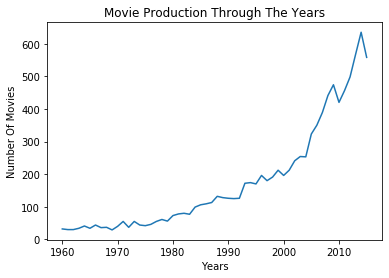

In [57]:
plt.title('Movie Production Through The Years')
plt.xlabel('Years')
plt.ylabel('Number Of Movies')
plt.plot(movies_time.index,movies_time.values);

The soluation of this problem is taking the propartiaon of each genre.

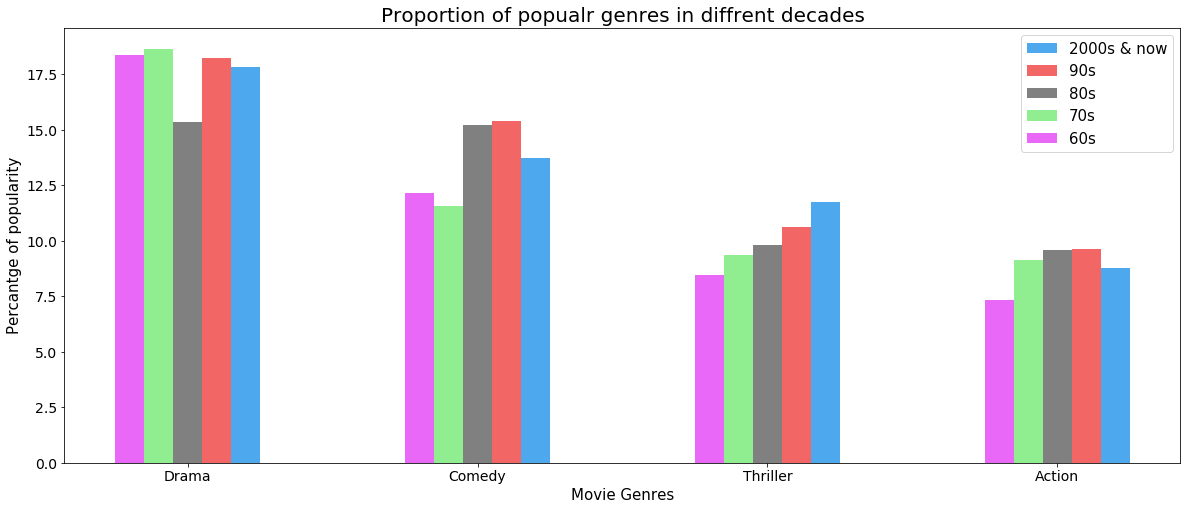

In [58]:
# values,1,2,3,4,5 are calucualted by deviding on total of all genres counts. To get the proportion.
# keys are the idices of each list which are the genres.
# xpos to have a numeric x-axis to represent the categorical variables.
# using this way we can simplly move each bar using math ops, as shown below when I did xpos+1, etc.
# idea behind xpos is taking from https://github.com/codebasics/py/blob/master/matpltlib/4_bar_chart/4_bar_chart.ipynb

keys = now_gen.index
values = now_gen.values / all_now 
xpos = np.arange(len(values))

keys2 = nine_gen.index
values2 = nine_gen.values / all_nine
xpos2 = np.arange(len(values2))


keys3 = eight_gen.index
values3 = eight_gen.values / all_eight
xpos3 = np.arange(len(values3))

keys4 = seven_gen.index
values4 = seven_gen.values / all_seven
xpos4 = np.arange(len(values4))

keys5 = six_gen.index
values5 = six_gen.values / all_six
xpos5 = np.arange(len(values5))

plt.figure(figsize=(20,8))

# values are multiplied by 100 to get percentage.
plt.bar(xpos+0.2,values*100,width=0.1, label="2000s & now",color='#4ea8ed')
plt.bar(xpos2+0.1,values2*100,width=0.1, label="90s",color='#f26666')
plt.bar(xpos3,values3*100,width=0.1, label="80s",color='gray')
plt.bar(xpos4-0.1,values4*100,width=0.1, label="70s",color='lightgreen')
plt.bar(xpos5-0.2,values5*100,width=0.1, label="60s",color='#e968f7')

plt.xticks(xpos,keys,fontsize=14) # to represent the numbers(xpos) with the corresponding genre(keys).
plt.yticks(fontsize=14)

plt.title('Proportion of popualr genres in diffrent decades',fontsize=20)
plt.ylabel('Percantge of popularity',fontsize=15)
plt.xlabel('Movie Genres',fontsize=15)

plt.legend(fontsize=15)
plt.show();

To be technical the above figure showed the 4 most popular genres in the 70s,80s,90s, and 2000s-now, not the 60s
as 'six_gen' will show you 'Romance' insted of 'Thriller', but 'Thriller' is not too far from 'Romance' only two movies diffrent between them.
for the seak of the argument I will contunue as if thriller is equle to romance.
Below is a demonstration of my point.

In [59]:
all_60s = flat(six.genres).value_counts()
all_60s[0:5]

Drama       163
Comedy      108
Action       75
Romance      65
Thriller     63
dtype: int64

<a id='conclusions'></a>
## Conclusions
> In summary we now know what actors/actress are associted with high move rating such as Rober Deniro, Tom Hanks, Samuel jakson, etc.
Simlirally production companies with high movie ratings such as Warner Bros, Univeral Pictures, Pixar Animation Studios, etc.
> A great finding was which genres gained the most revenue which are Drama, Comedy, Action, Thriller. also we saw a comparson between the four most popular genres in each decade.
>
> Limitations: the data set was not clean, alot of column had zero values and null that caused some problems.
> I used genres columns alot and it had '|' as seperated same with production_companies and cast members had to deal with them by using string maniplation.
> There is null values inside the genres/production_companies/cast_members that were not clear by using for example df.genres.isnull.sum() or df.info()
> after flattend the list it was more clear, and able to handel them.
